In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
books_rating_dataset = pd.read_csv('/content/drive/MyDrive/Books_rating.csv')

In [ ]:
# Agrego datos generados por mi pagina web
books_web = pd.read_csv('/content/drive/MyDrive/datos_generados_por_web.csv')

books_rating = pd.concat([books_rating_dataset, books_web], ignore_index=True)

In [ ]:
book_ratings.head()

,id,Title,price,user_id,profile_name,helpfulness,rating,time,summary,review,review_date,helpful_votes,total_votes,helpfulness_ratio
0,1882931173,Its Only Art If Its Well Hung!,0.0,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,1999-10-23,7,7,1.000000
1,0826414346,Dr. Seuss: American Icon,0.0,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,2004-09-21,10,10,1.000000
2,0826414346,Dr. Seuss: American Icon,0.0,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",2004-03-09,10,11,0.909091
3,0826414346,Dr. Seuss: American Icon,0.0,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",2004-07-25,7,7,1.000000
4,0826414346,Dr. Seuss: American Icon,0.0,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,2005-02-10,3,3,1.000000


In [ ]:
book_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2720232 entries, 0 to 2728500
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 object        
 1   Title              object        
 2   price              float64       
 3   user_id            object        
 4   profile_name       object        
 5   helpfulness        object        
 6   rating             float64       
 7   time               int64         
 8   summary            object        
 9   review             object        
 10  review_date        datetime64[ns]
 11  helpful_votes      int64         
 12  total_votes        int64         
 13  helpfulness_ratio  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 311.3+ MB


In [ ]:
# Normalizo los nombres de las columnas
book_ratings.columns = book_ratings.columns.str.replace('/','_')
book_ratings.rename(columns={
    'Id': 'id',
    'Title': 'Title',
    'Price': 'price',
    'User_id': 'user_id',
    'profileName': 'profile_name',
    'review_helpfulness': 'helpfulness',
    'review_score': 'rating',
    'review_time': 'time',
    'review_summary': 'summary',
    'review_text': 'review'
}, inplace = True)

In [ ]:
print(book_ratings.shape)
book_ratings.info()
book_ratings.isnull().sum()

(2720232, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 2720232 entries, 0 to 2728500
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 object        
 1   Title              object        
 2   price              float64       
 3   user_id            object        
 4   profile_name       object        
 5   helpfulness        object        
 6   rating             float64       
 7   time               int64         
 8   summary            object        
 9   review             object        
 10  review_date        datetime64[ns]
 11  helpful_votes      int64         
 12  total_votes        int64         
 13  helpfulness_ratio  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 311.3+ MB


,0
id,0
Title,200
price,0
user_id,511412
profile_name,511515
helpfulness,0
rating,0
time,0
summary,374
review,0


In [ ]:
# Normalizo la columna time
book_ratings['review_date'] = pd.to_datetime(book_ratings['time'], unit='s')

In [ ]:
# Cambio el formato en la columna helpfulness (ej "3/5" ➝ 3, 5)
book_ratings[['helpful_votes', 'total_votes']] = book_ratings['helpfulness'].str.split('/', expand=True)
book_ratings['helpful_votes'] = pd.to_numeric(book_ratings['helpful_votes'], errors='coerce')
book_ratings['total_votes'] = pd.to_numeric(book_ratings['total_votes'], errors='coerce')

# Se crea la columna ratio
book_ratings['helpfulness_ratio'] = book_ratings['helpful_votes'] / book_ratings['total_votes']

In [ ]:
book_ratings.isnull().sum()
book_ratings.dropna(subset=['rating','review'], inplace= True)
book_ratings['price'].fillna(0, inplace=True)
book_ratings.drop_duplicates(inplace=True)

<ipython-input-36-1547595838>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  book_ratings['price'].fillna(0, inplace=True)


In [ ]:
book_ratings = book_ratings[book_ratings['review'].str.len() > 5]

In [ ]:
print(book_ratings.shape)
book_ratings.isnull().sum()
book_ratings.head()

(2720232, 14)


,id,Title,price,user_id,profile_name,helpfulness,rating,time,summary,review,review_date,helpful_votes,total_votes,helpfulness_ratio
0,1882931173,Its Only Art If Its Well Hung!,0.0,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,1999-10-23,7,7,1.000000
1,0826414346,Dr. Seuss: American Icon,0.0,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,2004-09-21,10,10,1.000000
2,0826414346,Dr. Seuss: American Icon,0.0,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",2004-03-09,10,11,0.909091
3,0826414346,Dr. Seuss: American Icon,0.0,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",2004-07-25,7,7,1.000000
4,0826414346,Dr. Seuss: American Icon,0.0,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,2005-02-10,3,3,1.000000


In [ ]:
book_data = pd.read_csv('/content/drive/MyDrive/books_data.csv')

In [ ]:
book_data

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,Unknown,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,Unknown,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,Unknown,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",Unknown,['Edward Long'],Unknown,http://books.google.nl/books?id=399SPgAACAAJ&d...,Unknown,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,Unknown,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,Unknown,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],Unknown,http://books.google.com/books?id=zytVswEACAAJ&...,Unknown,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,Unknown,NaN
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0


In [ ]:
# Agrego en los missing values de book_data con "Unknown"
book_data['description'].fillna('Unknown', inplace=True)
book_data['authors'].fillna('Unknown', inplace=True)
book_data['image'].fillna('Unknown', inplace=True)
book_data['previewLink'].fillna('Unknown', inplace=True)
book_data['publisher'].fillna('Unknown', inplace=True)
book_data['publishedDate'].fillna('Unknown', inplace=True)
book_data['infoLink'].fillna('Unknown', inplace=True)

# Lleno las categorias faltantes antes de limpiar
book_data['categories'].fillna('Unknown', inplace=True)

# Limpio la columna categories removimiendo comillas y llaves
book_data['categories'] = book_data['categories'].str.replace(r"[\\[\\]']", '', regex=True).str.strip()

<ipython-input-40-3408008949>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  book_data['description'].fillna('Unknown', inplace=True)
<ipython-input-40-3408008949>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
# Unimos los dos dataframes por la columna Title
merged = pd.merge(book_data, book_ratings, on='Title', how='inner')

In [ ]:
# Creo las columnas: ratingsCount (group by por id, contando estos ultimos) y avgRating (group by por id y rating, sacando la media)
merged['ratingsCount'] = merged.groupby('id')['id'].transform('count')
merged['avgRating'] = merged.groupby('id')['rating'].transform('mean')

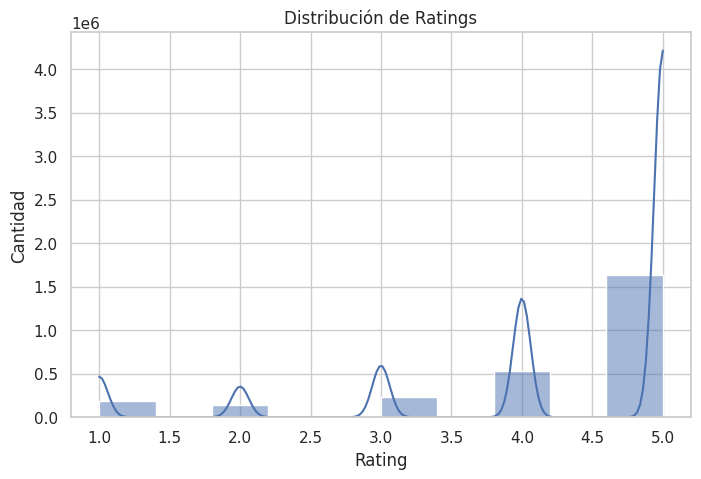

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))
sns.histplot(merged['rating'], bins=10, kde=True)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.show()

Como vemos en el grafico, encontramos gran cantidad de opiniones sobre libros mayores a 4.

Esto sugiere que en la pagina se comercaliza con buenos libros y es un buen dato para seguir comprando a los mismos autores o generos y sacandole el foco a los que tienen menos rating

<ipython-input-44-2022497407>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_books.index, x=top_books.values, palette='Blues_d')


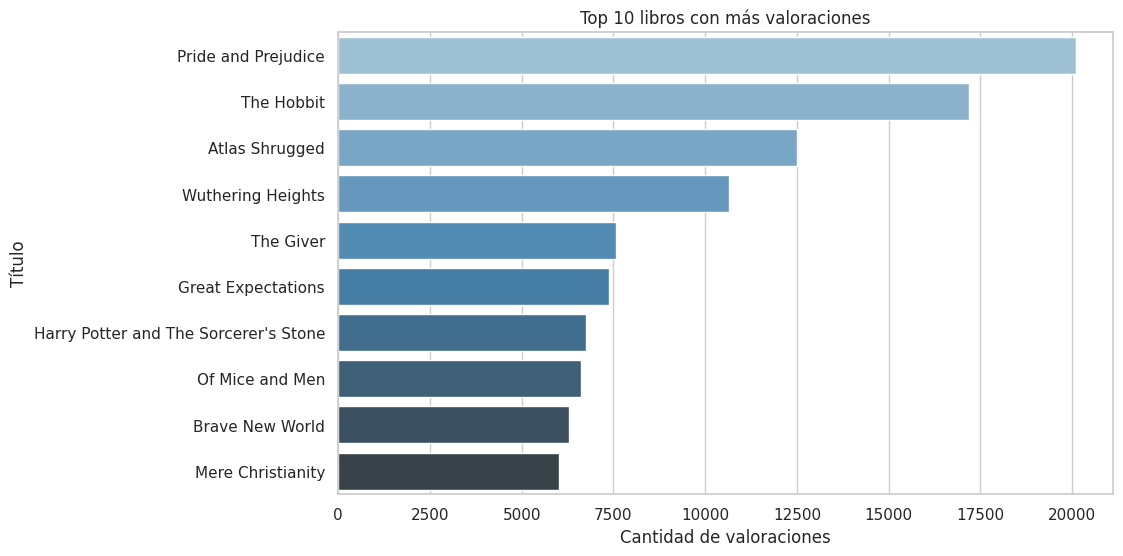

In [ ]:
top_books = merged['Title'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_books.index, x=top_books.values, palette='Blues_d')
plt.title('Top 10 libros con más valoraciones')
plt.xlabel('Cantidad de valoraciones')
plt.ylabel('Título')
plt.show()


Vemos los libros con mas valoraciones, viendo que se siguen vendiendo los clasicos y siempre es bueno mantenerlos en la pagina para seguir vendiendo.

Esto tambien sugiere que debemos agregar al catalogo nuevos libros para poder tener mayor variedad de libros pocos conocidos para el publico.

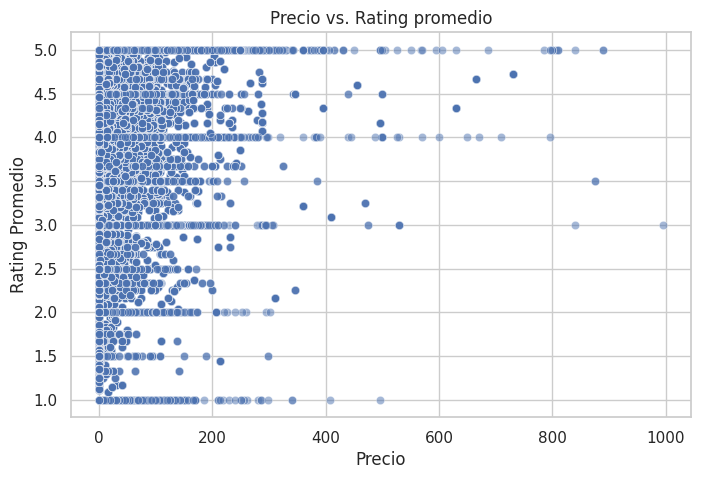

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged, x='price', y='avgRating', alpha=0.5)
plt.title('Precio vs. Rating promedio')
plt.xlabel('Precio')
plt.ylabel('Rating Promedio')
plt.show()


Vemos que no necesaiamente, los libros con mas rating son los mas caros, por lo que podriamos analizar agregar promociones en libros con menos rating para fomentar la compra de esos libros.

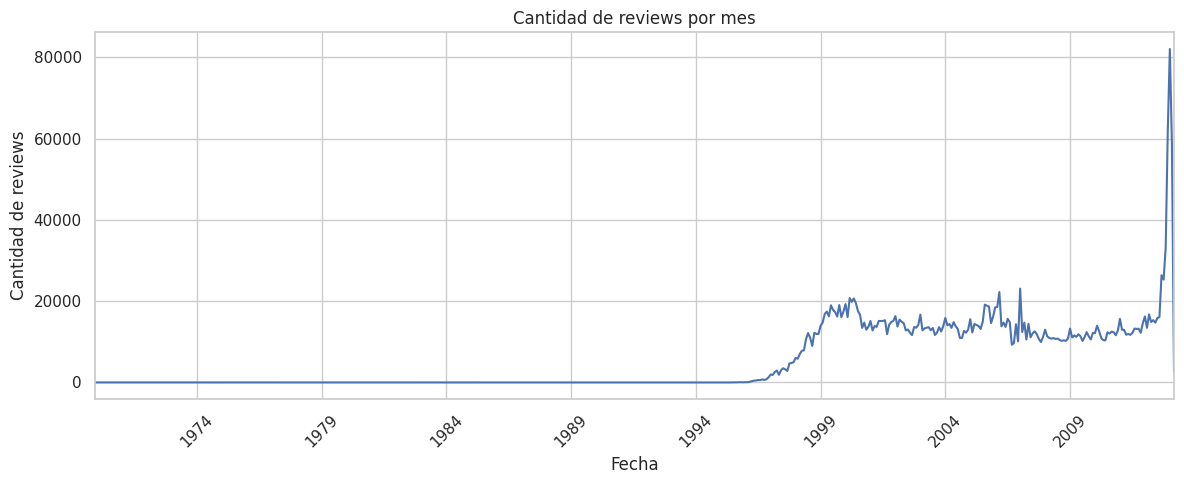

In [ ]:
reviews_by_date = merged.groupby(merged['review_date'].dt.to_period('M')).size()

plt.figure(figsize=(12, 5))
reviews_by_date.plot()
plt.title('Cantidad de reviews por mes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Encontramos que tenemos reviews actualizadas en el foro y podemos tomarlas en cuenta para un futuro analisis

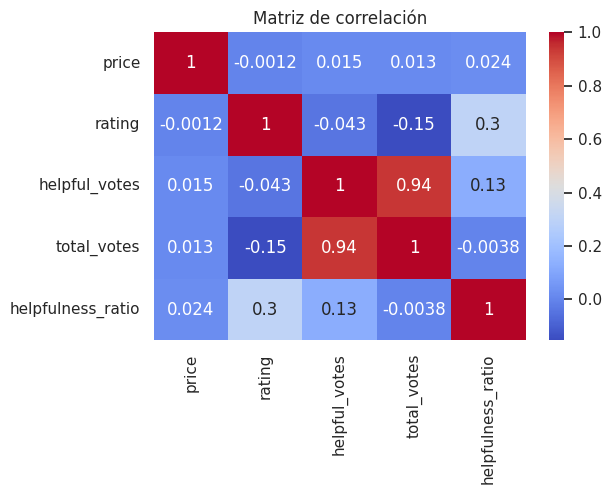

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(merged[['price', 'rating', 'helpful_votes', 'total_votes', 'helpfulness_ratio']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


Vemos que existe una fuerte relacion entre los votos totales y los votos que son utiles, esto quiere decir que en el foro tenemos una gran cantidad de votos utiles para analizar

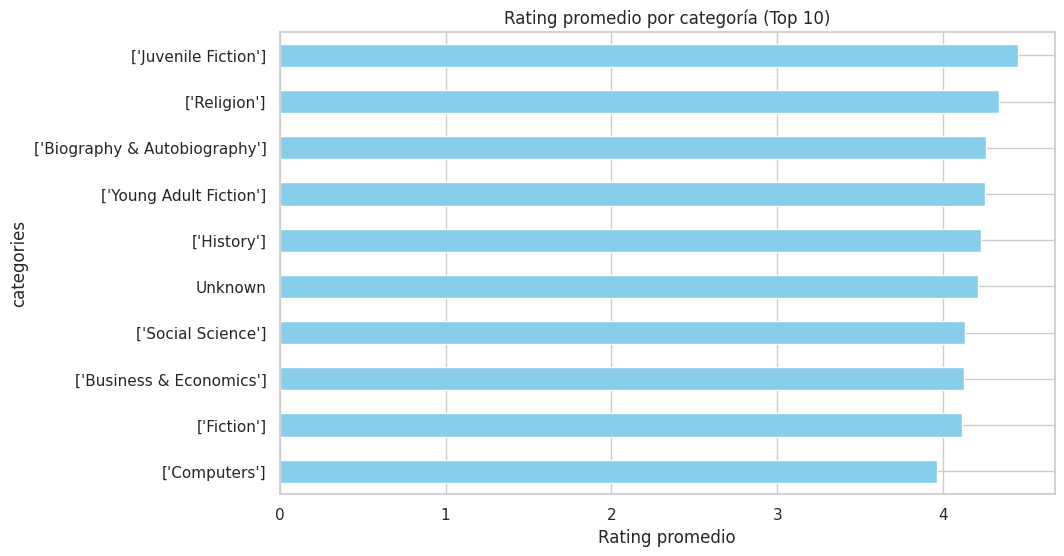

In [ ]:
top_categories = merged['categories'].value_counts().head(10).index
avg_rating_by_cat = merged[merged['categories'].isin(top_categories)].groupby('categories')['rating'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_rating_by_cat.plot(kind='barh', color='skyblue')
plt.xlabel('Rating promedio')
plt.title('Rating promedio por categoría (Top 10)')
plt.show()

Vemos el rating promedio por categoria para analizar que generos hay que poner el foco para seguir mejorandolos o aumentar otros para que sea mucho mas parejo el rating

Abajo vemos el mismo grafico, filtrando la categoria Unknown.

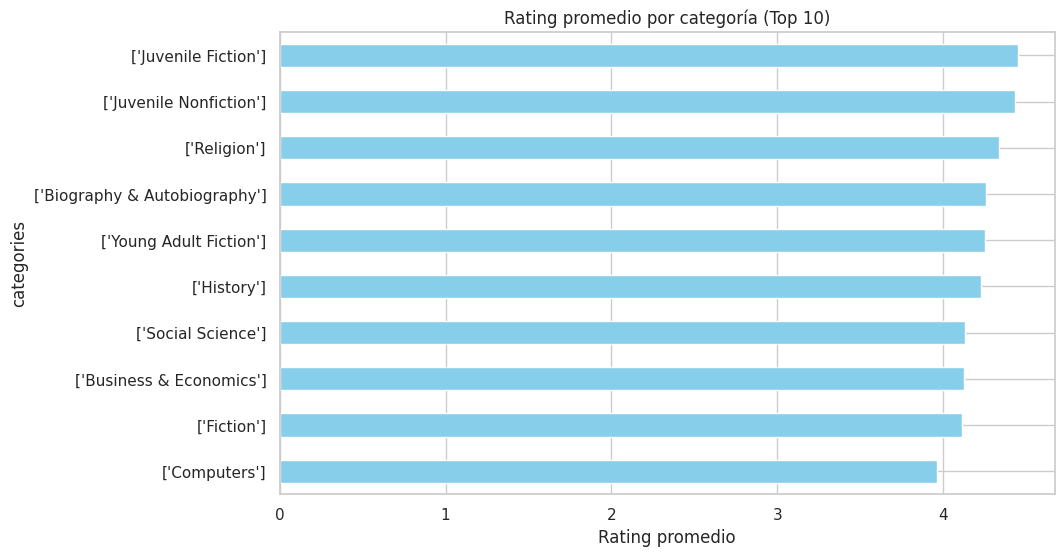

In [ ]:
# Filtrar categorías que no son 'Unknown'
categorias_validas = merged[merged['categories'] != 'Unknown']

# Obtener las 10 categorías más frecuentes
top_categories = categorias_validas['categories'].value_counts().head(10).index

# Calcular el rating promedio por esas categorías
avg_rating_by_cat = categorias_validas[categorias_validas['categories'].isin(top_categories)] \
                    .groupby('categories')['rating'] \
                    .mean() \
                    .sort_values()

plt.figure(figsize=(10, 6))
avg_rating_by_cat.plot(kind='barh', color='skyblue')
plt.xlabel('Rating promedio')
plt.title('Rating promedio por categoría (Top 10)')
plt.show()